In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# csv
df = pd.read_csv("nsmc_train.csv", encoding="utf-8")

# 컬럼명 변경
df = df.rename(columns={"review":"text", "rating":"label"})
df = df[["text", "label"]]

# 데이터 분리 
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)

print(f"데이터 형태 \n {df.shape}")
print(f"텍스트 샘플 \n {df["text"].iloc[0]}")

데이터 형태 
 (149993, 2)
텍스트 샘플 
 배우들의 인생연기가 돋보였던... 최고의 드라마


In [2]:
# 텍스트 전처리
import re

def clean_text(text):
    text = re.sub(r"[^ㄱ-ㅎ가-힣a-zA-Z0-9 ]", " ", str(text))
    text = re.sub(r"\s+", " ", text).strip().lower()
    return text

X_train = X_train.apply(clean_text)
x_test = X_test.apply(clean_text)


In [3]:
# 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(max_features=1000, ngram_range=(1,2))
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.fit_transform(X_test)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
# 모델
# 1. 로지스틱 회귀
log_model = LogisticRegression(max_iter = 200)
log_model.fit(X_train_vec, y_train)

# 2. 나이브 베이즈
nb_model = MultinomialNB(alpha=1.0)
nb_model.fit(X_train_vec, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [6]:
# 예측 및 평가
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. 로지스틱 회귀
y_pred_log = log_model.predict(X_test_vec)
print("=== Logistic Regression ===")
print(f"Acc : {round(accuracy_score(y_test, y_pred_log),3)}")
print(f"f1 : {round(f1_score(y_test, y_pred_log),3)}")
print(classification_report(y_test, y_pred_log, target_names=["부정(0)", "긍정(1)"]))

# 2. 나이브 베이즈
y_pred_nb = nb_model.predict(X_test_vec)
print("=== Logistic Regression ===")
print(f"Acc : {round(accuracy_score(y_test, y_pred_log),3)}")
print(f"f1 : {round(f1_score(y_test, y_pred_log),3)}")
print(classification_report(y_test, y_pred_log, target_names=["부정(0)", "긍정(1)"]))


=== Logistic Regression ===
Acc : 0.572
f1 : 0.529
              precision    recall  f1-score   support

       부정(0)       0.56      0.66      0.61     14997
       긍정(1)       0.59      0.48      0.53     15002

    accuracy                           0.57     29999
   macro avg       0.57      0.57      0.57     29999
weighted avg       0.57      0.57      0.57     29999

=== Logistic Regression ===
Acc : 0.572
f1 : 0.529
              precision    recall  f1-score   support

       부정(0)       0.56      0.66      0.61     14997
       긍정(1)       0.59      0.48      0.53     15002

    accuracy                           0.57     29999
   macro avg       0.57      0.57      0.57     29999
weighted avg       0.57      0.57      0.57     29999



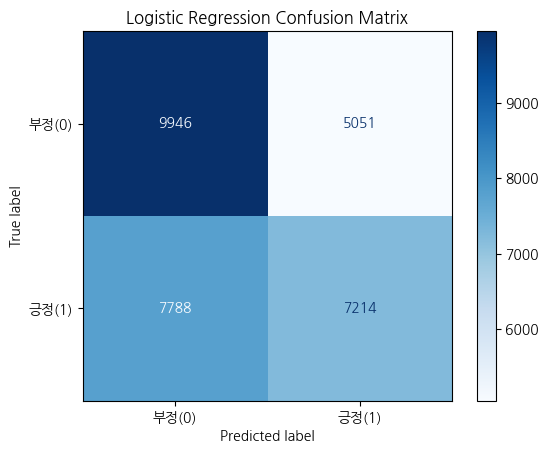

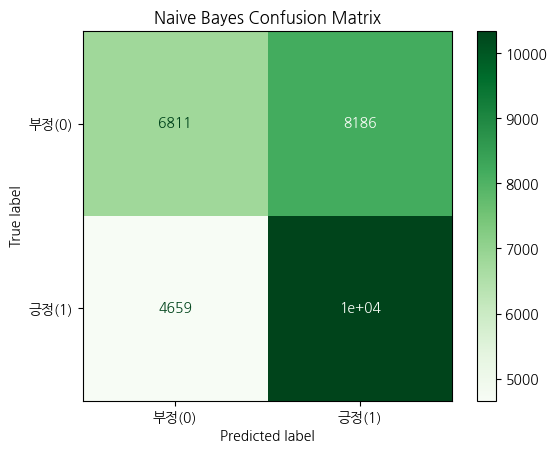

In [8]:
# 시각화
import koreanize_matplotlib
# 로지스틱 회귀
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_log),
                       display_labels=["부정(0)", "긍정(1)"]).plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# 나이브 베이즈
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_nb),
                       display_labels=["부정(0)", "긍정(1)"]).plot(cmap="Greens")
plt.title("Naive Bayes Confusion Matrix")
plt.show()


In [ ]:
new_reviews = [
    "배송이 빠르고 포장도 좋아요",
    "가격이 비싸고 품질이 안 좋아요",
    "설명과 달라서 실망이에요",
    "디자인이 예쁘고 만족합니다"
]

X_new = vec.transform(new_reviews)
pred_log = log_model.predict(X_new)
pred_nb = nb_model.predict(X_new)

import pandas as pd
result = pd.DataFrame({
    "리뷰": new_reviews,
    "로지스틱 예측": ["긍정😊" if p==1 else "부정😞" for p in pred_log],
    "나이브베이즈 예측": ["긍정😊" if p==1 else "부정😞" for p in pred_nb]
})
result


,리뷰,로지스틱 예측,나이브베이즈 예측
0,배송이 빠르고 포장도 좋아요,부정😞,부정😞
1,가격이 비싸고 품질이 안 좋아요,부정😞,부정😞
2,설명과 달라서 실망이에요,부정😞,긍정😊
3,디자인이 예쁘고 만족합니다,부정😞,긍정😊


: 